## <span style = "color: #12239E" > "Forbes World's Billionaires List 2022" </span>

### <span style = "color: #12239E"> Table of Contents </span>

* [1. Introduction](#Introduction_1)
    * [1.1 Objective](#Objective_1_1)
* [2. Load Library](#Load_Library_2)
* [3. Import and Data Preview](#Import_and_Data_Preview_3)
* [4. Sample Size and Statistics](#Sample_Size_and_Statistics_4)
* [5. Data Cleaning](#Data_Cleaning_5)
* [6. Data Analysis](#Data_Analysis_6)
     * [6.1 Top 5 Billionaires by Net Worth](#Top_5_Billionaires_by_Net_Worth_6_1)
     * [6.2 Top 5 Billionaires by Philanthropy Score](#Billionaires_by_Philanthropy_Score_6_2)
     * [6.3 Top 5 Female Billionaires by Net Worth](#Top_5_Female_Billionaires_by_Net_Worth_6_3)
     * [6.4 Top 5 Female Billionaires by Philanthropy Score](#Top_5_Female_Billionaires_by_Philanthrophy_Score_6_4)
     * [6.5 Age of Billionaires](#Age_of_Billionaires_6_5)
     * [6.6 Gender of Billionaires](#Gender_of_Billionaires_6_6)
     * [6.7 Type of Billionaires](#Type_of_Billionaires_6.7)
     * [6.8 Industry of Billionaires](#Industry_of_Billionaires_6_8)
     * [6.9 Country of Billionaires](#Country_of_Billionaires_6_9)
     * [6.10 Philanthropy Score of Billionaires](#Philanthropy_Score_of_Billionaires_6_10)
* [7. Data Visulization](#Data_Visualization_7)
     * [7.1. Top 5 Billionaires by Net Worth](#Top_5_Billionaires_by_Net_Worth_7_1)
     * [7.2. Top 5 Billionaires by Philanthropy Score](#Top_5_Billionaires_by_Philanthropy_Score_7_2)
     * [7.3. Top 5 Female Billionaires by Net Worth](#Top_5_Female_Billionaires_by_Net_Worth_7_3)
     * [7.4. Gender of Billionaires](#Gender_of_Billionaires_7_4)
     * [7.5. Age Group](#Age_Group_7_5)
     * [7.6. Self Made](#Self_Made_7_6)
     * [7.7. Leading Industry by Billionaires](#Leading_Industry_by_Billionaires_7_7)
     * [7.8. Leading Industry by Total Net Worth](#Leading_Industry_by_Total_Net_Worth_7_8)
     * [7.9. Country of Majority Billionaires](#Country_of_Majority_Bilionaires_7_9)
     * [7.10. Leading Country by Net Worth](#Leading_Country_by_Net_Worth_7_10)
* [8. Conclusion](#Conclusion_8)
* [9. Helpful Sources](#Helpful_Sources_9)

    


### <span style = "color: #12239E"> 1. Introduction </span> <a class = "anchor" id = "Introduction_1"></a>

After I completed Google Data Analytic Course, I wanted to explore more with R. So, I took the data set "Forbes World's Billionaire List 2022" that I had joint a challenge with Onyx Data in June 2022 to do more practice with R. I found out I really excited to learn R programming, and no matter how long it took to figure out some errors while processing it, I was not esily to get tired.

R reminds me of machine learning, SQL and python. It likes three tastes combination of statistical, stractural, and programming language. It is more interest when use it with SQL data frame. Lot of things to learn about R, and I will keep learning and practicing about it. I encourage you to try R to have fun like me, if it is your interest.

### <span style = "color: #12239E"> 1.1 Objective </span> <a class = "anchor" id = "Objective_1_1"></a>

The objective is to
* identify who is the most philanthropic billionaire
* identify which industry drives the most billionaires
* explore more with R for data processing

### <span style = "color: #12239E"> 2. Load Library </span> <a class = "anchor" id = "Load_Library_2"></a>


In [ ]:
#install ggpubr to use ggarrange
devtools::install_github("kassambara/ggpubr")

#install.packages("sqldf")

In [ ]:
# an opinionated collection of R packages designed for data science
library(tidyverse)

# a wrapper for the rprojroot package, rprojroot is a powerful tool for working with project directories
library(here)

# provide summary statistics about variables in data frames, tibbles, data tables and vectors
library(skimr)

#has simple functions for examining and cleaning dirty data
library(janitor)

#a structure of data manipulation that provides a uniform set of verbs, helping to resolve the most frequent data manipulation hurdles
library(dplyr)

#makes it easier to work with dates and times
library(lubridate)

# repel overlapping text labels away from each other and away from the data points that they label.
library(ggrepel)

# allow arrange the charts
library(ggpubr)

# write like SQL
library(sqldf)

#get map
library(rworldmap)
# pie Chart
library(lessR)
#3d pie chart
library(plotrix)

#format currency
library(formattable)

### <span style = "color: #12239E"> 3. Import and Data Preview </span> <a class = "anchor" id = "Import_and_Data_Preview_3"></a>


In [ ]:
#Import data
forbes_billinaires_22 <- read.csv("../input/forbes-worlds-billionaires-list-2022/forbes_2022_billionaires.csv")

#column Name
colnames (forbes_billinaires_22)

# Dimension 
dim (forbes_billinaires_22)


#Data Types
str(forbes_billinaires_22)

#
head(forbes_billinaires_22)

### <span style = "color: #12239E"> 4. Sample Size and Statistics </span> <a class = "anchor" id = "Sample_Size_and_Statistics_4"></a>


In [ ]:
# sameple size
n_distinct(forbes_billinaires_22)

#check statistical of age and final worth (in million usd)
forbes_billinaires_22 %>%  
  select(age,finalWorth) %>%
  summary()

* The youngest billionaire is at age 19, and oldest is 100. 
* Minimum of Net Worth in Million USD is 1000, and Maximum is 219000 Million USD.

### <span style = "color: #12239E"> 5. Data Cleaning </span> <a class = "anchor" id = "Data_Cleaning_5"></a>


In [ ]:
#Checking duplicate
sum(duplicated(forbes_billinaires_22))

#check if any missing value exist , True means it NA exist
anyNA(forbes_billinaires_22) 

#get which column anem is NA exist
names(which(colSums(is.na(forbes_billinaires_22))>0))

#get positon of the NA column
which(colSums(is.na(forbes_billinaires_22))>0)


* Data has no duplication, but has missing values. Those missing values are in column number 3: age, column number 18: PhilanthropyScore, and column number 20: numberOfSiblings 

In [ ]:
#Replace by mean value

forbes_billinaires_22$age[is.na(forbes_billinaires_22$age)]<- mean(forbes_billinaires_22$age, na.rm = T)
forbes_billinaires_22$philanthropyScore[is.na(forbes_billinaires_22$philanthropyScore)]<- mean(forbes_billinaires_22$philanthropyScore, na.rm = T)
forbes_billinaires_22$numberOfSiblings[is.na(forbes_billinaires_22$numberOfSiblings)]<- mean(forbes_billinaires_22$numberOfSiblings, na.rm = T)
# Re check if any NA values still - False means not more NA
anyNA(forbes_billinaires_22)

* After filled those missing values with the average of each column, now no more missing values.


In [ ]:
# clean name 
forbes_22 <- clean_names(forbes_billinaires_22)
colnames(forbes_22)


* All column names are cleaned to standard name

In [ ]:
#Clean Gender type

gender_group <- forbes_22 %>%
mutate(gender_group = ifelse(forbes_22$gender == "M", "Male",
                      ifelse(forbes_22$gender == "F", "Female","Not given" )))

head(gender_group)

* Genders that show M, F, and N/A are filled with full word Male, Female, and Not given

In [ ]:
#Clean Self made Status

self_made_status <- forbes_22 %>%
mutate(self_made_status = ifelse(forbes_22$self_made == "True", "Self Made","Others"))

head(self_made_status)


* Self Made where shows True and False are now filled with 'Self Made' if True, and 'Others' if false.

### <span style = "color: #12239E"> 6. Data Analysis </span> <a class = "anchor" id = "Data_Analysis_6"></a>

### <span style = "color: #12239E"> 6.1 Top 5 Billionaires by Net Worth </span> <a class = "anchor" id = "Top_5_Billionaires_by_Net_Worth_6_1"></a>


In [ ]:
# top billionaires by net worth
networth <- forbes_22 
top_five <- head(networth[order(-networth$final_worth),], 5)
top_five

### <span style = "color: #12239E"> 6.2 Top 5 Billionaires by Philanthropy Score </span> <a class = "anchor" id = "Billionaires_by_Philanthropy_Score_6_2"></a>


In [ ]:
score <- forbes_22 
top_five_score <- head(score[order(-score$philanthropy_score),],5)
top_five_score

### <span style = "color: #12239E"> 6.3 Top 5 Female Billionaires by Net Worth</span> <a class = "anchor" id = "Top_5_Female_Billionaires_by_Net_Worth_6_3"></a>


In [ ]:
# Get top 5 female billionaires by net worth
female <- forbes_22 
top_five_female <- head(sqldf("select * from female where gender = 'F'"),5)

top_five_female


### <span style = "color: #12239E"> 6.4 Top 5 Female Billionaires by Philanthropy Score</span> <a class = "anchor" id = "Top_5_Female_Billionaires_by_Philanthrophy_Score_6_4"></a>


In [ ]:
# get female billionaires by philantrophy Score
female_by_score <- forbes_22
top_five_female_score <- head(sqldf("select * from female_by_score where philanthropy_score = 5 and gender = 'F'"),5)
top_five_female_score

### <span style = "color: #12239E"> 6.5 Age of Billionaires </span> <a class = "anchor" id = "Age_of_Billionaires_6_5"></a>


In [ ]:
# find average Age of Billionaires

avg_age = mean(forbes_22$age)
round(avg_age, digits = 0)

In [ ]:
# cetagories age group

age_group <- forbes_22 %>%
    mutate(age_group = case_when(
        forbes_22$age <= 19 ~ ">20",
        forbes_22$age >= 20 & forbes_22$age <=29 ~ "20-29",
        forbes_22$age >= 30 & forbes_22$age <=39 ~ "30-39",
        forbes_22$age >= 40 & forbes_22$age <=49 ~ "40-49",
        forbes_22$age >= 50 & forbes_22$age <=59 ~ "50-59",
        forbes_22$age >= 60 & forbes_22$age <=69 ~ "60-69",
        forbes_22$age >= 70 & forbes_22$age <=79 ~ "70-79",
        forbes_22$age >= 80 & forbes_22$age <=89 ~ "80-89",
        forbes_22$age >= 90 & forbes_22$age <=99 ~ "90-99",
        forbes_22$age >= 100 ~ ">=100"))
#head(age_group)



In [ ]:
# Get Age group by percentage
age_group_percent <- age_group %>%

    group_by(age_group) %>%
    summarise(total = n()) %>%
    mutate(total_percent = total/sum(total)) %>%
    mutate(percentage = scales::percent(total_percent))

age_group_percent$age_group <- factor(age_group_percent$age_group,
                                      levels = c(">20","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90-99",">=100"))

#age group order by larger percent 
desc_age_group_percent <- age_group_percent[order(-age_group_percent$total_percent),]

print("Age group by total percent")
desc_age_group_percent



### <span style = "color: #12239E"> 6.6 Gender of Billionaires </span> <a class = "anchor" id = "Gender_of_Billionaires_6_6"></a>


In [ ]:
#Get Gender Percentage
gender_group_percent <- gender_group %>%

    group_by(gender_group) %>%
    summarise(total = n()) %>%
    mutate(total_percent = total/sum(total)) %>%
    mutate(percentage = scales::percent(total_percent))

gender_group_percent$gender_group <- factor(gender_group_percent$gender_group,
                                      levels = c("Male","Female","Not given"))

gender_group_percent

### <span style = "color: #12239E"> 6.7 Type of Billionaires </span> <a class = "anchor" id = "Type_of_Billionaires_6.7"></a>


In [ ]:
# Get Self Made Percentage
self_made_percent <- self_made_status %>%

    group_by(self_made_status) %>%
    summarise(total = n()) %>%
    mutate(total_percent = total/sum(total)) %>%
    mutate(percentage = scales::percent(total_percent))
    
self_made_percent$self_made_status <- factor(self_made_percent$self_made_status,
                                      levels = c("Self Made","Others"))

self_made_percent

### <span style = "color: #12239E"> 6.8 Industry of Billionaires </span> <a class = "anchor" id = "Industry_of_Billionaires_6_8"></a>


In [ ]:
# Get leading Inudstry Percentage by numbers of billionaires

industry_percent_by_billionaire <- forbes_22%>%

    group_by(category) %>%
    summarise(total = n()) %>%
    mutate(total_percent = total/sum(total)) %>%
    mutate(percentage = scales::percent(total_percent))

industry_percent_by_billionaire$category <- factor(industry_percent_by_billionaire$category,
                                      levels = c(industry_percent_by_billionaire$category))
#arrange the leading industry by total percent descening 
leading_industry_by_billionaire = head(industry_percent_by_billionaire[order(-industry_percent_by_billionaire$total_percent),],10)
leading_industry_by_billionaire

In [ ]:
# Get leading Inudstry Percentage by number of net worth

industry_percent_by_networth <- forbes_22%>%

    group_by(category) %>%
    summarise(total_in_million_USD = sum(final_worth)) %>%
    mutate(total_percent = total_in_million_USD/sum(total_in_million_USD)) %>%
    mutate(labels = scales::percent(total_percent))

industry_percent_by_networth$category <- factor(industry_percent_by_networth$category,
                                      levels = c(industry_percent_by_networth$category))

#arrange the leading industry by total percent descening 
leading_industry_by_networth = head(industry_percent_by_networth[order(-industry_percent_by_networth$total_percent),],5)
leading_industry_by_networth$total_in_million_USD <-currency(leading_industry_by_networth$total_in_million_USD, digits =0L) # currency format
leading_industry_by_networth

### <span style = "color: #12239E"> 6.9 Country of Billionaires </span> <a class = "anchor" id = "Country_of_Billionaires_6_9"></a>


In [ ]:
#get country has host billionaire
country_percent_by_billionaire <- forbes_22%>%

    group_by(country) %>%
    summarise(total = n()) %>%
    mutate(total_percent = total/sum(total)) %>%
    mutate(percentage = scales::percent(total_percent))

country_percent_by_billionaire$country <- factor(country_percent_by_billionaire$country,
                                      levels = c(country_percent_by_billionaire$country))

#arrange the leading industry by total percent descening 
leading_country_by_billionaire = head(country_percent_by_billionaire[order(-country_percent_by_billionaire$total_percent),],5)
leading_country_by_billionaire

In [ ]:
# get country by count of billionaires

count_bil <- leading_country_by_billionaire
total_count <- sqldf("select country, total from count_bil")
total_count

In [ ]:
#Country that have more worth 
country_percent_by_networth <- forbes_22%>%

    group_by(country) %>%
    summarise(total_in_million_USD = sum(final_worth)) %>%
    mutate(total_percent = total_in_million_USD/sum(total_in_million_USD)) %>%
    mutate(percentage = scales::percent(total_percent))

country_percent_by_networth$country <- factor(country_percent_by_networth$country,
                                      levels = c(country_percent_by_networth$country))

#arrange the leading industry by total percent descening 
leading_country_by_networth = head(country_percent_by_networth[order(-country_percent_by_networth$total_percent),],5)
leading_country_by_networth$total_in_million_USD <-currency(leading_country_by_networth$total_in_million_USD, digits =0L)
leading_country_by_networth

In [ ]:
#get total net worth by country , keep for world map (Optinal)
country_map_netw <- forbes_22%>%

    group_by(country) %>%
    summarise(total_in_million_USD = sum(final_worth))
    
#arrange the leading industry by total percent descening 
world_map <- head(country_map_netw[order(-country_map_netw$total_in_million_USD),],5)
world_map$country  <- str_trim(world_map$country)
world_map 

### <span style = "color: #12239E"> 6.10 Philanthropy Score of Billionaires </span> <a class = "anchor" id = "Philanthropy_Score_of_Billionaires_6_10"></a>


In [ ]:
philanthropy_group <- forbes_22 %>%
    mutate(philanthropy_group = case_when(
        round(forbes_22$philanthropy_score,digits =0) == 1 ~ "<1% of wealth",
        round(forbes_22$philanthropy_score,digits=0) == 2 ~ "1%-4.99% of wealth",
        round(forbes_22$philanthropy_score,digits=0) == 3 ~ "5%-9.99% of wealth",
        round(forbes_22$philanthropy_score,digits=0) == 4 ~ "10%-19.99% of wealth",
        round(forbes_22$philanthropy_score,digits =0) == 5 ~ ">=20% of wealth"))
#head(philanthropy_group,2)

In [ ]:
# Get score group by percentage

score_group_percent <- philanthropy_group %>%

    group_by(philanthropy_group) %>%
    summarise(total = n()) %>%
    mutate(total_percent = total/sum(total)) %>%
    mutate(percentage = scales::percent(total_percent))

score_group_percent$philanthropy_group <- as.character(factor(score_group_percent$philanthropy_group,
                                      levels = c("<1% of wealth","1%-4.99% of wealth","5%-9.99% of wealth","10%-19.99% of wealth",">=20% of wealth")))

#age group order by larger percent 
philanthropy_score_group_percent<- score_group_percent[order(-score_group_percent$total_percent),]

philanthropy_score_group_percent


In [ ]:
# use SQL df to select column interested (optional)
phil_group <- philanthropy_score_group_percent
phil_total <- sqldf("select philanthropy_group, total from phil_group")
phil_total

In [ ]:
# Get networth percent

networth_percent <- philanthropy_group %>%

    group_by(philanthropy_group) %>%
    summarise(total_in_million_USD = sum(final_worth)) %>%
    mutate(total_percent = total_in_million_USD/sum(total_in_million_USD)) %>%
    mutate(percentage = scales::percent(total_percent))

networth_percent$philanthropy_group <- factor(networth_percent$philanthropy_group,
                                      levels = c("<1% of wealth","1%-4.99% of wealth","5%-9.99% of wealth","10%-19.99% of wealth",">=20% of wealth"))

#age group order by larger percent 
philanthropy_networth <- networth_percent[order(-networth_percent$total_percent),]

philanthropy_networth$total_in_million_USD <-currency(philanthropy_networth$total_in_million_USD, digits= 0L)

philanthropy_networth

### <span style = "color: #12239E"> 7. Data Visualization </span> <a class = "anchor" id = "Data_Visualization_7"></a>
### <span style = "color: #12239E"> 7.1. Top 5 Billionaires by Net Worth </span> <a class = "anchor" id = "Top_5_Billionaires_by_Net_Worth_7_1"></a>



In [ ]:
top_5_billionaires_networht <- ggplot(top_five, aes (x = reorder(person_name, -final_worth), y = final_worth))+ 
    geom_bar(stat = "identity")+ geom_col(fill = "#E799A3")+ labs(title = "Top 5 by Net Worth", x= "", y = "Million USD")+
    theme(axis.text.x = element_text(angle = 45,vjust = 1, hjust = 1))

top_5_billionaires_age <- ggplot(top_five, aes (x = reorder(person_name, +age), y = age))+ 
    geom_bar(stat = "identity")+ geom_col(fill = "#82CAFF")+ labs(title = "Top 5 by Age", x= "", y = "Age") +
    geom_hline(yintercept = 50)+
    theme(axis.text.x = element_text(angle = 45,vjust = 1, hjust = 1))

ggarrange(
top_5_billionaires_networht,
top_5_billionaires_age)

* All of the top 5 billionaires by net worth at least 50 years-old

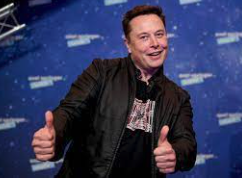

* Mr. Elon Musk is a CEO and the richest and youngest among the top 5 billionaires by net worth. He is 50 years-old with net worth of 219000 million USD.
* The industry of his income is Automotive, source: SpaceX and Tesla, country: United States, and state: Texas. 
* Self Made? yes. 
* Rank: 1
* About: "Musk was accepted to a graduate program at Stanford, but deferred attendance to launch his first business, software company Zip2. As a kid Musk taught himself to code; he sold his first game, Blastar, for about $500"




### <span style = "color: #12239E"> 7.2. Top 5 Billionaires by Philanthropy Score </span> <a class = "anchor" id = "Top_5_Billionaires_by_Philanthropy_Score_7_2"></a>


In [ ]:
#get categories score percentage by number of Billionaires
score_percent <- philanthropy_score_group_percent
 ggplot(score_percent, aes(x= "",y = total_percent, fill = philanthropy_group)) +
        geom_bar(stat = "identity")+
        coord_polar("y", start = 1)+ 
        theme_minimal()+
        theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size = 16, face = "bold")) +
        scale_fill_manual(values = c("#3385ff","#47d147", "#ffcc00", "#ff471a","#00FFFF")) +
        geom_text(aes(x= 1.6, label = percentage), position = position_stack(vjust = 0.5))+
        labs(title="Philanthropy by Percent",subtitle= "Philanthropy Score: 1 is <1%, 2 is 1-4.99%, 3 is 5-9.99%, 4 is 10-19.99%, and 5 is >=20%")

#count value of billionaires by philanthropy cegtegory
count_billionaires <- ggplot(score_percent, aes (x = reorder(philanthropy_group, -total), y = total))+ 
    geom_bar(stat = "identity")+ geom_col(fill = "#82E0AA")+ labs(title = "Philanthropy by Billionaires", x= "", y = "count")+
    theme(axis.text.x = element_text(angle = 45,vjust = 1, hjust = 1))+geom_text(aes(label = total),
            position = position_stack(vjust = 0.6))
count_billionaires

* From 2668 Billionaires, only 0.34% or 9 billionaires that have contributed from 20% or more of their wealths. 
* Most of billionaires contribute between 1-4.99% of their wealths. This group is up to 90%, which is 2407 billionaires from the total.

In [ ]:
#get categories of score by total net worth percentage
netw <- philanthropy_networth
 ggplot(netw, aes(x= "",y = total_percent, fill = philanthropy_group)) +
        geom_bar(stat = "identity")+
        coord_polar("y", start = 1)+ 
        theme_minimal()+
        theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size = 16, face = "bold")) +
        scale_fill_manual(values = c("#3385ff","#47d147", "#ffcc00", "#ff471a","#00FFFF")) +
        geom_text(aes(x= 1.6, label = percentage), position = position_stack(vjust = 0.5))+
        labs(title="Percent by Net Worth Contribution",subtitle= "Philanthropy Score: 1 is <1%, 2 is 1-4.99%, 3 is 5-9.99%, 4 is 10-19.99%, and 5 is >=20%")

#get networth value by philanthropy cegtegory
group_netw <- ggplot(netw, aes (x = reorder(philanthropy_group, +total_in_million_USD), y = total_in_million_USD))+ 
    geom_bar(stat = "identity")+ geom_col(fill = "#E799A3")+ labs(title = "Net Worth by Philanthropy Percent", x= "", y = "Million USD")+
    theme(axis.text.x = element_text(angle = 45,vjust = 1, hjust = 1))+geom_text(aes(label = total_in_million_USD),
            position = position_stack(vjust = 0.6))
group_netw

* By combining all the net worths from each score of philanthropy, the group of 9 billionaires that have philanthropy score of 5 contribute up to $157,100 million USD equal to 1.236% from the total net worth.

In [ ]:
#get top 5 philanthropy billionaires by net worth
top_5_billionaires_score <- ggplot(top_five_score, aes (x = reorder(person_name, +final_worth), y = final_worth))+ 
    geom_bar(stat = "identity")+ geom_col(fill = "#E799A3")+ labs(title = "Top 5 Philanthropy by Net Worth", x= "", y = "Million USD")+
    theme(axis.text.x = element_text(angle = 45,vjust = 1, hjust = 1))

#get top 5 philanthropy billionaires by age
top_5_billionaires_age <- ggplot(top_five_score, aes (x = reorder(person_name, +age), y = age))+ 
    geom_bar(stat = "identity")+ geom_col(fill = "#82CAFF")+ labs(title = "Top 5 Philanthropy by Age", x= "", y = "Age") + 
    geom_hline(yintercept = 75)+
    theme(axis.text.x = element_text(angle = 45,vjust = 1, hjust = 1))
ggarrange(
top_5_billionaires_score,
top_5_billionaires_age)

* Top 5 Philanthropic billionaires are in a group contribution of >=20.
* All of them are above age 75.

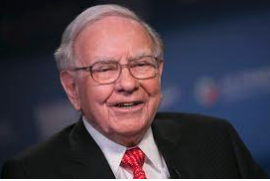

* Mr. Warren Buffet is a CEO and the richest among the top 5 philanthropic billionaires. He is 91 years-old with net worth of 118000 million USD.
* The industry of his income is Finance & Investment, source: Berkshire Hathaway, country: United States, and state: Nebraska.
* Self Made? Yes
* Rank: 5
* About: "Buffett still lives in the same Omaha, Nebraska, home he purchased in 1958 for $31,500. Buffett was rejected from Harvard Business School; he got a master's in economics from Columbia University instead."



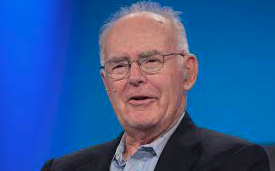

* Mr. Gordon Moore is a Cofounder and Chairman Emeritus and the oldest among the top 5 philanthropic billionaires. He is 93 years-old with net worth of 9500 million USD.
* The industry of his income is Technology, source: Intel, country: United States, and state: Califonia.
* Self Made? Yes
* Rank: 214
* About: "He and his wife launched the Gordon and Betty Moore Foundation in 2000. It has over 6 billion in assets and gives aways 300 million in grants a year. The foundation supports environmental conservation, patient care, scientific research and projects in the San Francisco Bay Area.	Moore and his wife joined the Giving Pledge in 2012, promising to donate half of their wealth to charitable causes. In his first year as a student at U.C. Berkeley, Gordon belonged to the Rocket Society and designed a rocket engine."

### <span style = "color: #12239E"> 7.3. Top 5 Female Billionaires by Net Worth </span> <a class = "anchor" id = "Top_5_Female_Billionaires_by_Net_Worth_7_3"></a>


In [ ]:
#female by net worth
top_female_billionaires_networth <- ggplot(top_five_female, aes (x = reorder(person_name, +final_worth), y = final_worth))+ 
    geom_bar(stat = "identity")+ geom_col(fill = "#E799A3")+ labs(title = "Top 5 Female by Net Worth", x= "", y = "Million USD")+
    theme(axis.text.x = element_text(angle = 45,vjust = 1, hjust = 1)) 
#female by age
top_female_billionaires_age <- ggplot(top_five_female, aes (x = reorder(person_name, +age), y = age))+ 
    geom_bar(stat = "identity") + geom_col(fill = "#AF7AC5")+ labs(title = "Top 5 Female by Age", x= "", y = "Age") +
    theme(axis.text.x = element_text(angle = 45,vjust = 1, hjust = 1))+
    geom_hline(yintercept = 50) 

ggarrange(
top_female_billionaires_networth,
top_female_billionaires_age)


*All top 5 ladies are above age 50.

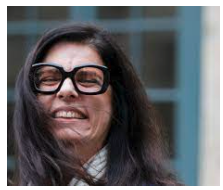

* Ms. Francoise Bettencourt Meyers & family own around 33% of L'Oreal stock. She is 68 years-old and a richest female among the top 5 females. She and her family have net worth of 74800 million USD.
* The industry of her and her family income is Fashion & Retail, source: L'Oréal, and country: France.
* Self Made? No
* Rank: 14
* About: "Bettencourt Meyers' inheritance was the subject of a sensational trial in France, in which a man was convicted of manipulating her ailing mother for her fortune. Bettencourt Meyers is also writer and has authored a book on the Greek gods and another with commentary on the Bible."


In [ ]:
#philanthropy female  by net worth
top_philanthropy_female_networth <- ggplot(top_five_female_score, aes (x = reorder(person_name, +final_worth), y = final_worth))+ 
    geom_bar(stat = "identity")+ geom_col(fill = "#E799A3")+ labs(title = "Top 5 Philanthropy Female by Net Worth", x= "", y = "Million USD")+
    theme(axis.text.x = element_text(angle = 45,vjust = 1, hjust = 1)) 

#philanthropyfemale by age
top_philanthropy_female_age <- ggplot(top_five_female_score, aes (x = reorder(person_name, +age), y = age))+ 
    geom_bar(stat = "identity") + geom_col(fill = "#AF7AC5")+ labs(title = "Top 5 Philanthropy Female by Age", x= "", y = "Age") +
    theme(axis.text.x = element_text(angle = 45,vjust = 1, hjust = 1))+
    geom_hline(yintercept = 75) 

ggarrange(
top_philanthropy_female_networth,
top_philanthropy_female_age)


* Only one female philanthropic female that has philanthropy score up to 5, which is higest score with contribution >=20%
* Age above 75 years-old

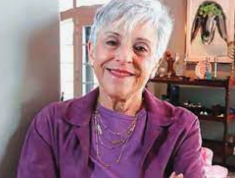


* Ms. Lynn Schusterman is the only female billionaire with highest philanthropy score  of 5, which contribute from 20% or more of her wealths. She is 83 years-old with net worth of 3500 million USD.
* The industry of her income is from Energy, source:oil & gas,Investment, country: United States, and state: Oklahoma.
* Self Made? No
* Rank: 851
* About: "Under KKR's leadership, Samson filed for bankruptcy in 2015, burdened with too much debt as oil prices fell."

### <span style = "color: #12239E"> 7.4.Gender of Billionaires </span> <a class = "anchor" id = "Gender_of_Billionaires_7_4"></a>


In [ ]:
# gender by pecent
gender <- gender_group_percent
    gender_percent <- ggplot(gender, aes(x= "",y = total_percent, fill = gender_group)) +
          geom_bar(stat = "identity", width = 1)+
          coord_polar("y", start = 1)+
          theme_minimal()+
          theme(axis.title.x= element_blank(),
            axis.title.y = element_blank(),
            panel.border = element_blank(), 
            panel.grid = element_blank(), 
            axis.ticks = element_blank(),
            axis.text.x = element_blank(),
            plot.title = element_text(hjust = 0.5, size = 14, face = "bold")) +
            scale_fill_manual(values = c("#3385ff","#47d147", "#ffcc00")) +
            geom_text(aes(label = percentage),
            position = position_stack(vjust = 0.5))+
            labs(title="Gender by Percent")

#gender by number of billionaires
gender_num <- ggplot(gender_group_percent, aes (x = reorder(gender_group, +total), y = total))+ 
    geom_bar(stat = "identity") + geom_col(fill = "#85C1E9")+ labs(title = "Gender by Number of Billionaires", x= "", y = "count") +
    theme(axis.text.x = element_text(angle = 45,vjust = 1, hjust = 1))+ geom_text(aes(label = total),
            position = position_stack(vjust = 0.9))
ggarrange(
gender_percent,
gender_num)

* Most of billionaires are males which is 88%:2341 while female is 12%:311. Small percent of genders are not given,1%:16.


### <span style = "color: #12239E"> 7.5. Age Group </span> <a class = "anchor" id = "Age_Group_7_5"></a>



In [ ]:
#age by percent

age_by_percentage <- ggplot(desc_age_group_percent, aes(age_group, total_percent)) +
      geom_col(fill = "#82CAFF") + 
      labs(title = "Age Group by Percent", x= "", y = "percent") +
      theme(axis.text.x = element_text(angle = 45,vjust = 0.5, hjust = 1))+ geom_text(aes(label = percentage),
            position = position_stack(vjust = 0.9))
age_by_percentage

#age by count of billionaires
age_by_count <- ggplot(desc_age_group_percent, aes(age_group, total)) +
      geom_col(fill = "#E799A3") + 
      labs(title = "Age Group by Billionaires", x= "", y = "count") +
      theme(axis.text.x = element_text(angle = 45,vjust = 0.5, hjust = 1))+ geom_text(aes(label = total),
            position = position_stack(vjust = 0.9))
age_by_count

* Most of billionaires are in the group of 60-69: 744 with 27.89%, 50-59:678 with 25.41%, and 70-79:562 with 21.06%.

### <span style = "color: #12239E"> 7.6. Self Made </span> <a class = "anchor" id = "Self_Made_7_6"></a>


In [ ]:
#self made by percentage
self_made <- self_made_percent
    self_made_by_percent <- ggplot(self_made, aes(x= "",y = total_percent, fill =self_made_status )) +
          geom_bar(stat = "identity", width = 1)+
          coord_polar("y", start = 1)+
          theme_minimal()+
          theme(axis.title.x= element_blank(),
            axis.title.y = element_blank(),
            panel.border = element_blank(), 
            panel.grid = element_blank(), 
            axis.ticks = element_blank(),
            axis.text.x = element_blank(),
            plot.title = element_text(hjust = 0.5, size = 14, face = "bold")) +
            scale_fill_manual(values = c("#58D68D","#F1C40F")) +
            geom_text(aes(label = percentage),
            position = position_stack(vjust = 0.5))+
            labs(title="Self Made by Percent")

#self made by count of billionaires
self_made_count <- ggplot(self_made_percent, aes (x = reorder(self_made_status, +total), y = total))+ 
    geom_bar(stat = "identity") + geom_col(fill = "#F1948A")+ labs(title = "Self Made by Billionires", x= "", y = "count") +
    theme(axis.text.x = element_text(angle = 45,vjust = 1, hjust = 1))+ geom_text(aes(label = total),
            position = position_stack(vjust = 0.9))
ggarrange(
self_made_by_percent,
self_made_count)

* Most of billionaires are self made, which is 71% or 1891 billionaires are in group of self made while 29% or 777 billionaires are in group of non-self made. 

### <span style = "color: #12239E"> 7.7. Leading Industry by Billionaires </span> <a class = "anchor" id = "Leading_Industry_by_Billionaires_7_7"></a>


In [ ]:
#Industry by percent
industry_by_percent <- ggplot(leading_industry_by_billionaire, aes (x = reorder(category, +total_percent), y = total_percent))+ 
    geom_bar(stat = "identity")+ geom_col(fill = "#F1C40F")+ labs(title = "Top 10 by Percent", x = " ", y = "percent")+
    theme(axis.text.x = element_text(angle = 45,vjust = 1, hjust = 1))+ coord_flip()+ geom_text(aes(label = percentage),
            position = position_stack(vjust = 0.6))

#industry by count
industry_by_count <- ggplot(leading_industry_by_billionaire, aes (x = reorder(category, +total), y = total))+ 
    geom_bar(stat = "identity") + geom_col(fill = "#2ECC71")+ labs(title = "Top 10 by Count", x = " ",y = "Billionaires") +
    theme(axis.text.x = element_text(angle = 45,vjust = 1, hjust = 1))+ coord_flip()+ geom_text(aes(label = total),
            position = position_stack(vjust = 0.6))
    
ggarrange(
industry_by_percent,
industry_by_count)


* This is top 10 leading industries that majority of Billionaires own. 
* Finance and Investent have most billionaires that up to 14.593% or 392 billionaires. 
* Second leading industry is Technology with 12.856% or 343 billionaires, 
* and third is manufacturing with 12.631% or 337 billionaires from total forbes billionaires list 2022.

### <span style = "color: #12239E"> 7.8. Leading Industry by Total Net Worth </span> <a class = "anchor" id = "Leading_Industry_by_Total_Net_Worth_7_8"></a>


In [ ]:
#percent of total net woth by industry
industry_by_networth_percent <- ggplot(leading_industry_by_networth, aes (x = reorder(category, total_percent), y = total_percent))+ 
    geom_bar(stat = "identity")+ geom_col(fill = "#3498DB")+ labs(title = "Top 5 by Percent", x = " ", y = "percent")+
    theme(axis.text.x = element_text(angle = 45,vjust = 1, hjust = 1))+ coord_flip()+ geom_text(aes(label = labels),
            position = position_stack(vjust = 0.5))

#industry by count
industry_by_networth_sum <- ggplot(leading_industry_by_networth, aes (x = reorder(category, +total_in_million_USD), y = total_in_million_USD))+ 
    geom_bar(stat = "identity") + geom_col(fill = "#E74C3C")+ labs(title = "Top 5 by Net Worth", x = " ",y = "Million USD") +
    theme(axis.text.x = element_text(angle = 45,vjust = 1, hjust = 1))+ coord_flip()+ geom_text(aes(label = total_in_million_USD),
            position = position_stack(vjust = 0.5))
    
ggarrange(
industry_by_networth_percent,
industry_by_networth_sum)


* By combining the total net worth of each industry, technology is an industry has most values, which is 17.176% or $2,182,400 million USD. 
*Finance and Investement become second place industry when all the net worth combine, which means even this industry more billionaires than other industries, but it generates less value than techology. 

### <span style = "color: #12239E"> 7.9. Country of Majority Billionaires </span> <a class = "anchor" id = "Country_of_Majority_Bilionaires_7_9"></a>


In [ ]:
# Country by Billionaire Count
hsize <- 3  # thickness of donut chart
df <- total_count%>%
  mutate(x = hsize)

top_5_country <- ggplot(df, aes(x = hsize, y = total, fill = country)) +
  geom_col(color = "black") +
    geom_text(aes(x =3 , label = total), position = position_stack(vjust = 0.5))+
  coord_polar(theta = "y") +
    scale_fill_brewer(palette = "GnBu")+
  xlim(c(0.2, hsize + 0.5))+
theme(panel.background = element_rect(fill = "white"),
        panel.grid = element_blank(),
        axis.title = element_blank(),
        axis.ticks = element_blank(),
        axis.text = element_blank())+ 
        labs(title="Top 5 Countries by Billionaires")
top_5_country

In [ ]:
#  country by percent of billionaires
country_sep <- leading_country_by_billionaire
slices <- country_sep$total
lbls <- country_sep$percentage
top_10_country <- pie3D(slices,labels=lbls,radius = 1, explode=0, labelcex =1)
par(xpd = TRUE)
legend(1,0.5,legend=country_sep$country,cex=0.5,yjust=0.2, xjust = -0.1,
       fill = heat.colors(length(country_sep$total)))  
title(main="Top 5 Countries by Percent")

* United State is in the first place of having majority number of billionaires, about 748 which equal to 28.036%. 
* China is the second billionaire country with 21.402% or 571 billionaires.

### <span style = "color: #12239E"> 7.10. Leading Country by Net Worth </span> <a class = "anchor" id = "Leading_Country_by_Net_Worth_7_10"></a>


In [ ]:
#country by total net worth
country_by_networth_sum <- ggplot(leading_country_by_networth, aes (x = reorder(country, +total_in_million_USD), y = total_in_million_USD))+ 
    geom_bar(stat = "identity") + geom_col(fill = "#D4AC0D")+ labs(title = "Top 5 Countries by Net Worth", x = " ",y = "Million USD") +
    theme(axis.text.x = element_text(angle = 45,vjust = 1, hjust = 1))+ coord_flip()+ geom_text(aes(label = total_in_million_USD),
            position = position_stack(vjust = 0.9))

country_by_networth_sum

* United State is still in the first place by total wealth of billionaires  with total net wortth of $4,753,500 million USD. 
*Same to China, still in second place of world billionaires.

### <span style = "color: #12239E"> 8. Conclusion </span> <a class = "anchor" id = "Conclusion_8"></a>

|No.| Description|
| --- | --- |
| 1 | Total Billionaires: 2668, Average Age of Billionaire: 64, Total Net Worth : 12.7T, Total Self Made: 1891, Total Male: 2341, Total Female: 311. |
| 2 | A top billionaire by net worth is Elon Musk. He is a CEO and the richest and youngest among the top 5 billionaires by net worth. He is 50 years-old with net worth of 219000 million USD. The industry of his income is Automotive, source: SpaceX and Tesla, country: United States, and state: Texas. Self Made? yes. Rank: 1. |
| 3 | Top philanthropic billionaire is Mr. Warren Buffet. He is a CEO and the richest among the top 5 philanthropic billionaires. He is 91 years-old with net worth of 118000 million USD. The industry of his income is Finance & Investment, source: Berkshire Hathaway, country: United States, and state: Nebraska. Self Made? YesRank: 5. |
| 4 | Oldest Philanthropic Billionare is Gordon Moore. He is a Cofounder and Chairman Emeritus and the oldest among the top 5 philanthropic billionaires. He is 93 years-old with net worth of 9500 million USD. The industry of his income is Technology, source: Intel, country: United States, and state: Califonia. Self Made? Yes. Rank: 214 |
| 5 | To female Billionaire by net worth is Francoise bettencourt. She and family own around 33% of L'Oreal stock. She is 68 years-old and a richest female among top 5 female. She and her family have net worth 74800 million USD. The industry of her and her family income is Fashion & Retail, source: L'Oréal, and country: France. Self Made? No. Rank: 14. |
| 6 | Top Female Philanthropic Billionire is Lynn Schusterman. She is the only female billionaire with highest philanthropy score of 5, which contribute from 20% or more of her wealth. She is 83 years-old with net worth of 3500 million USD. The industry of her income is from Energy, source:oil & gas,Investment, country: United States, and state: Oklahoma. Self Made? No. Rank: 851.|
| 7 | Top country has majority number of billionaires and high value of net worth is United States.Then, the second country is China. |
| 8 | Top leading Industry by billionaires count is Finance and Investment. |
| 9 | Top leading industry by total net worth is Technology. |
| 10 | Majority of Billionaires are Male and self made.|
| 11 | From 2668 Billionaires, only 0.34% or 9 billionaires that have contributed from 20% or more of their wealth. Most of Billionaires contribute between 1-4.99% of their wealth. This group is up to 90%, which equal to 2407 billionaires from the total. |



### <span style = "color: #12239E"> 9. Helpful Sources </span> <a class = "anchor" id = "Helpful_Sources_9"></a>


Find missing values
https://www.codingprof.com/3-ways-to-find-columns-with-nas-in-r-examples/

Replacing missing Values
https://www.journaldev.com/39695/replace-in-r

Calculate the percentage by a group in R, dplyr
https://datacornering.com/calculate-the-percentage-by-a-group-in-r-dplyr/

Data Visualization with R
https://rkabacoff.github.io/datavis/Univariate.html

R-Ladies Sydney
https://rladiessydney.org/courses/ryouwithme/03-vizwhiz-1/#1-4-putting-it-all-together-dplyr-ggplot

Data transformation
https://r4ds.had.co.nz/transform.html

Visualizing data with ggplot2
https://datacarpentry.org/dc_zurich/R-ecology/05-visualisation-ggplot2.html

Color Picker
https://htmlcolorcodes.com/

Plotting the world map in R
https://stackoverflow.com/questions/30706124/plotting-the-world-map-in-r

How can I move the percentage labels outside of the pie chart in ggplot2?
https://stackoverflow.com/questions/64530631/how-can-i-move-the-percentage-labels-outside-of-the-pie-chart-in-ggplot2

Represent numeric value with typical dollar amount format
https://stackoverflow.com/questions/22070777/represent-numeric-value-with-typical-dollar-amount-format

Pie Charts
https://www.statmethods.net/graphs/pie.html

3D pie chart: legend is too big
https://stackoverflow.com/questions/46078933/3d-pie-chart-legend-is-too-big


Donut chart in ggplot2
https://r-charts.com/part-whole/donut-chart-ggplot2/

